In [1]:
from matplotlib.image import imread 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

name_of_file = "./Images/20220710.PNG"

In [2]:
image= imread(name_of_file)

In [3]:
image.shape

# image is represented in 3d matrix
# first val is height
# second val is width'
# third val is # of color channels (RGBA)

(690, 682, 4)

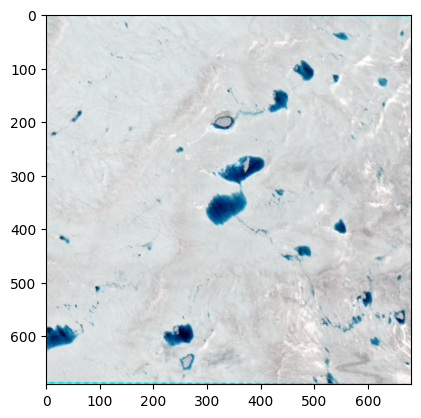

In [4]:
plt.imshow(image)

In [5]:
X = image.reshape(-1,4)

In [6]:
X.shape

(470580, 4)

In [7]:
# K-means clustering
from sklearn.cluster import KMeans

In [8]:
# Create n clusters of colors
kmeans = KMeans(n_clusters = 6).fit(X)

In [9]:
kmeans.cluster_centers_

array([[0.86339164, 0.8795813 , 0.8808367 , 1.        ],
       [0.01776785, 0.26466787, 0.4699801 , 1.        ],
       [0.8215163 , 0.83178896, 0.83294123, 1.        ],
       [0.18670207, 0.9124364 , 0.91304094, 1.        ],
       [0.7396648 , 0.75630057, 0.7631061 , 1.        ],
       [0.30386454, 0.5641167 , 0.66980535, 1.        ]], dtype=float32)

In [10]:
kmeans.labels_

array([3, 3, 3, ..., 3, 3, 3])

In [11]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]

In [12]:
segmented_image

array([[0.18670207, 0.9124364 , 0.91304094, 1.        ],
       [0.18670207, 0.9124364 , 0.91304094, 1.        ],
       [0.18670207, 0.9124364 , 0.91304094, 1.        ],
       ...,
       [0.18670207, 0.9124364 , 0.91304094, 1.        ],
       [0.18670207, 0.9124364 , 0.91304094, 1.        ],
       [0.18670207, 0.9124364 , 0.91304094, 1.        ]], dtype=float32)

In [13]:
print(set(list(kmeans.labels_)))

{0, 1, 2, 3, 4, 5}


In [14]:
segmented_image = segmented_image.reshape(image.shape)

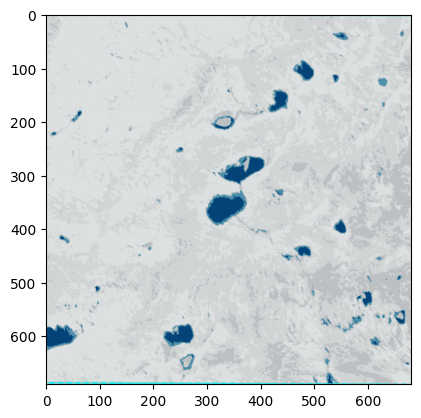

In [15]:
plt.imshow(segmented_image)

In [16]:
kmeans.inertia_

1206.885986328125

In [17]:
# from sklearn.metrics import silhouette_score

## Calculate Silhouette score
# silhouette_score(X, kmeans.labels_)

In [18]:
from collections import Counter

labels = kmeans.labels_
print(labels)
counts = Counter(labels)
print(counts)

[3 3 3 ... 3 3 3]
Counter({0: 213343, 2: 191633, 4: 46394, 1: 9028, 5: 7018, 3: 3164})
